In [1]:
from bpr_model import BPR
from dataloader import AmazonDataset
from training import TrainIterater
from evaluate import Evaluater

In [4]:
dataset = AmazonDataset('./data')
embedding_dim = 32
bpr = BPR(embedding_dim, len(dataset.user_list), len(dataset.item_list))
iterater = TrainIterater(batch_size=256)
eval_model = Evaluater()

epoch: 9  precision: 0.006164438103745469
epoch: 19  precision: 0.009722765768796956
epoch: 29  precision: 0.021900472536780083
epoch: 39  precision: 0.059409513995345345
epoch: 49  precision: 0.12715206077692756
epoch: 59  precision: 0.2058142700795201
epoch: 69  precision: 0.2287526734734176
epoch: 79  precision: 0.2335990589173227
epoch: 89  precision: 0.24049274683482094
epoch: 99  precision: 0.24021203959155837


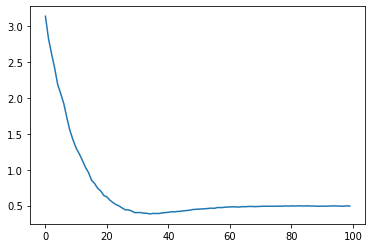

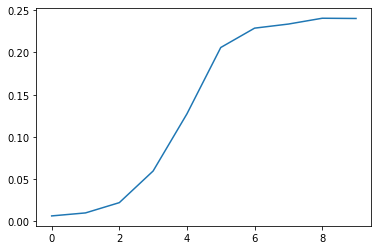

In [5]:
# ハイパラ
# embed_dim
# batch_size
# weight_decay, lr, warmup, lr_decay_every, lr_decay_rate

iterater.iterate_epoch(bpr, lr=0.001, epoch=100, weight_decay=0.0001, eval_every=10)

In [15]:
import pandas as pd
import numpy as np
import pickle

params = pd.read_csv('./result/hyparams_result.csv')

In [9]:
np.argmin(params['value'])

18

In [13]:
params[18:19]

,Unnamed: 0,number,value,datetime_start,datetime_complete,duration,params_batch_size,params_embedding_dim,params_lr,params_lr_decay_every,params_lr_decay_rate,params_warmup,params_weight_decay,state
18,18,18,-0.325806,2020-07-12 12:27:43.894090,2020-07-12 12:49:27.591464,0 days 00:21:43.697374000,192.0,48.0,0.002288,1,0.858685,356,0.000001,COMPLETE


In [16]:
best_param = {'batch_size': 192,
                'embedding_dim': 48,
                'lr': 0.002288,
                'lr_decay_every': 1,
                'lr_decay_rate': 0.858685,
                'warmup': 356,
                'weight_decay': 0.000001}

with open('./result/best_param.pickle', 'wb') as f:
    pickle.dump(best_param, f)